In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option("display.max_rows", 40)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

#magic commands and notebook settings
%matplotlib notebook
#make notebook wider
from IPython.display import HTML
display(HTML("<style>.container { width:70%; } </style>"))

In [16]:
known.columns

Index(['order_date', 'delivery_date', 'item_id', 'item_size', 'item_color',
       'brand_id', 'item_price', 'user_id', 'user_title', 'user_dob',
       'user_state', 'user_reg_date', 'return'],
      dtype='object')

In [2]:
#import known data
known = pd.read_csv('BADS_WS1819_known.csv',index_col=0, parse_dates=['order_date','delivery_date','user_reg_date','user_dob'])
#import unlabelled data
unknown = pd.read_csv('BADS_WS1819_unknown.csv',index_col=0, parse_dates=['order_date','delivery_date','user_reg_date','user_dob'])

In [3]:
known.head(30)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
order_item_id,,,,,,,,,,,,,
ID1,2016-05-13,2016-05-16,1040,38,red,138,69.90,19065,Mrs,NaT,Lower Saxony,2016-05-14,1
ID2,2016-09-26,NaT,4490,m,grey,133,59.90,32349,Mrs,1967-02-21,North Rhine-Westphalia,2015-02-17,0
ID3,2017-02-28,2017-05-09,4792,m,ecru,128,99.90,74743,Mrs,NaT,North Rhine-Westphalia,2017-02-14,0
ID4,2017-01-23,2017-01-24,4686,L,terracotta,105,59.90,32935,Mrs,1961-01-08,North Rhine-Westphalia,2015-02-17,0
ID5,2016-05-13,2016-05-16,648,39,petrol,170,139.90,2842,Mrs,1966-05-01,Schleswig-Holstein,2015-04-06,1
ID6,2016-06-27,2016-06-29,826,46,purple,111,44.90,10005,Mrs,1958-03-05,North Rhine-Westphalia,2015-02-17,1
ID7,2017-02-23,2017-02-26,3696,40,ocher,174,35.90,76165,Mrs,NaT,Bavaria,2017-02-24,1
ID8,2016-11-09,2016-11-13,3136,41,red,116,159.90,61594,Mrs,1978-09-04,North Rhine-Westphalia,2015-02-17,1
ID9,2016-08-07,2016-08-22,4176,8,black,119,119.90,40827,Mr,1976-10-21,Bavaria,2016-08-08,1


In [4]:
unknown.head(30)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date
order_item_id,,,,,,,,,,,,
ID100001,2016-04-23,2016-04-26,244,40,black,61,59.90,12206,Mrs,1949-11-21,Bavaria,2015-11-24
ID100002,2017-01-28,2017-02-04,2655,XL,denim,31,89.90,6578,Family,1977-11-23,North Rhine-Westphalia,2015-12-23
ID100003,2017-01-19,2017-05-03,2823,unsized,brown,158,59.90,26094,Mrs,NaT,North Rhine-Westphalia,2016-06-04
ID100004,2016-04-23,2016-04-26,402,l,grey,46,29.90,12345,Mrs,1958-10-08,Lower Saxony,2015-02-17
ID100005,2016-04-04,2016-04-06,31,38,red,22,39.98,2557,Mr,1971-02-10,Hesse,2015-02-17
ID100006,2016-09-17,2016-09-19,1687,xl,black,3,39.90,48394,Mrs,1970-02-14,Hesse,2015-03-02
ID100007,2016-06-25,2016-06-26,896,xl,grey,33,9.90,5041,Mrs,1976-09-11,North Rhine-Westphalia,2016-04-09
ID100008,2016-04-09,2016-04-14,842,37,black,1,89.90,6351,Mrs,1968-09-19,Berlin,2015-03-13
ID100009,2017-02-08,2017-02-11,2574,M,ocher,36,109.90,21790,Mrs,1971-12-25,Rhineland-Palatinate,2015-02-17


In [5]:
known.describe(include='all')

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
count,100000,91708,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000,89977,100000,100000,100000.000000
unique,365,319,NaN,114,85,NaN,NaN,NaN,5,12121,16,775,NaN
top,2016-06-27 00:00:00,2017-04-04 00:00:00,NaN,l,black,NaN,NaN,NaN,Mrs,1900-11-21 00:00:00,North Rhine-Westphalia,2015-02-17 00:00:00,NaN
freq,1100,1129,NaN,7599,17896,NaN,NaN,NaN,95976,858,23370,29416,NaN
first,2016-04-01 00:00:00,1994-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-11-21 00:00:00,NaN,2015-02-17 00:00:00,NaN
last,2017-03-31 00:00:00,2017-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-11-12 00:00:00,NaN,2017-04-01 00:00:00,NaN
mean,NaN,NaN,2799.935460,NaN,NaN,129.865530,70.279144,33423.093120,NaN,NaN,NaN,NaN,0.481740
std,NaN,NaN,1862.591355,NaN,NaN,30.145314,44.973992,23962.095319,NaN,NaN,NaN,NaN,0.499669
min,NaN,NaN,4.000000,NaN,NaN,101.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,666.000000,NaN,NaN,105.000000,34.900000,12944.000000,NaN,NaN,NaN,NaN,0.000000


In [6]:
unknown.describe(include='all')

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date
count,50000,45947,50000.00000,50000,50000,50000.000000,50000.000000,50000.000000,50000,44881,50000,50000
unique,365,310,NaN,110,82,NaN,NaN,NaN,5,10527,16,774
top,2016-06-27 00:00:00,2016-07-03 00:00:00,NaN,l,black,NaN,NaN,NaN,Mrs,1900-11-21 00:00:00,North Rhine-Westphalia,2015-02-17 00:00:00
freq,584,580,NaN,3854,9043,NaN,NaN,NaN,47994,424,11517,14652
first,2016-04-01 00:00:00,1994-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-11-21 00:00:00,NaN,2015-02-17 00:00:00
last,2017-03-31 00:00:00,2017-07-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-25 00:00:00,NaN,2017-04-01 00:00:00
mean,NaN,NaN,1402.46018,NaN,NaN,29.804860,70.473694,33361.894900,NaN,NaN,NaN,NaN
std,NaN,NaN,930.10425,NaN,NaN,30.153177,45.995238,24038.048605,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00000,NaN,NaN,1.000000,0.000000,6.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,340.00000,NaN,NaN,5.000000,34.900000,12807.000000,NaN,NaN,NaN,NaN


In [7]:
known.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, ID1 to ID100000
Data columns (total 13 columns):
order_date       100000 non-null datetime64[ns]
delivery_date    91708 non-null datetime64[ns]
item_id          100000 non-null int64
item_size        100000 non-null object
item_color       100000 non-null object
brand_id         100000 non-null int64
item_price       100000 non-null float64
user_id          100000 non-null int64
user_title       100000 non-null object
user_dob         89977 non-null datetime64[ns]
user_state       100000 non-null object
user_reg_date    100000 non-null datetime64[ns]
return           100000 non-null int64
dtypes: datetime64[ns](4), float64(1), int64(4), object(4)
memory usage: 10.7+ MB


In [8]:
unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, ID100001 to ID150000
Data columns (total 12 columns):
order_date       50000 non-null datetime64[ns]
delivery_date    45947 non-null datetime64[ns]
item_id          50000 non-null int64
item_size        50000 non-null object
item_color       50000 non-null object
brand_id         50000 non-null int64
item_price       50000 non-null float64
user_id          50000 non-null int64
user_title       50000 non-null object
user_dob         44881 non-null datetime64[ns]
user_state       50000 non-null object
user_reg_date    50000 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(3), object(4)
memory usage: 5.0+ MB


C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


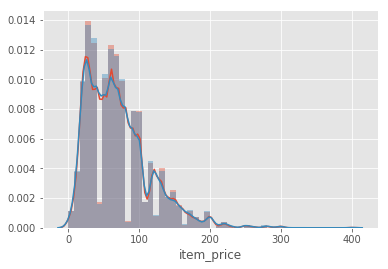

In [9]:
# both dfs are similar in some regards, i.e. item_price...
sns.distplot(known['item_price'][known['item_price']<400])
sns.distplot(unknown['item_price'][unknown['item_price']<400])

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


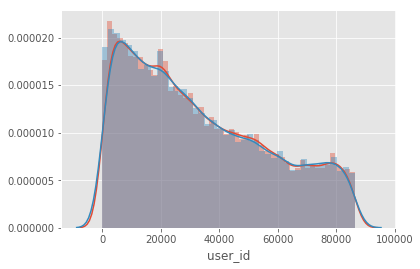

In [15]:
# ... and user_id...
sns.distplot(known['user_id'])
sns.distplot(unknown['user_id'])

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


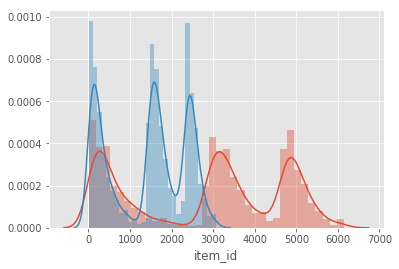

In [10]:
# ...but not in all regards
sns.distplot(known['item_id'])
sns.distplot(unknown['item_id'])

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


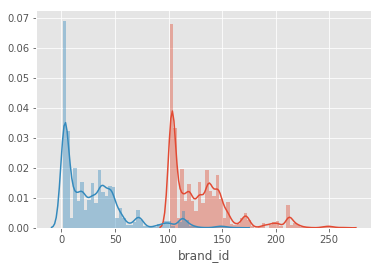

In [11]:
# and:
sns.distplot(known['brand_id'])
sns.distplot(unknown['brand_id'])

In [12]:
# brand_id and item_id are changed between the two datasets, but the transformations are easy to guess
unknown['item_id']=(unknown['item_id']+1)*2
unknown['brand_id']=unknown['brand_id']+100

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


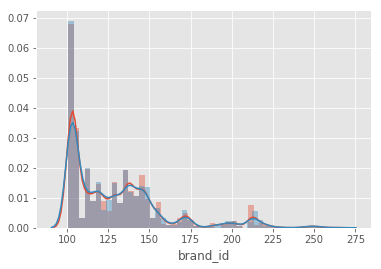

In [13]:
# this looks better
sns.distplot(known['brand_id'])
sns.distplot(unknown['brand_id'])

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


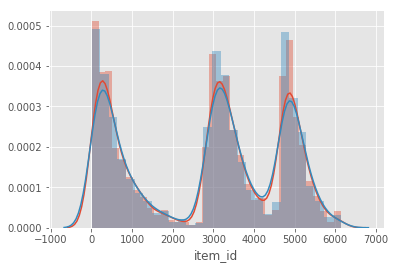

In [14]:
sns.distplot(known['item_id'])
sns.distplot(unknown['item_id'])